# Matplotlib的综合应用——空气质量监测数据的图形化展示

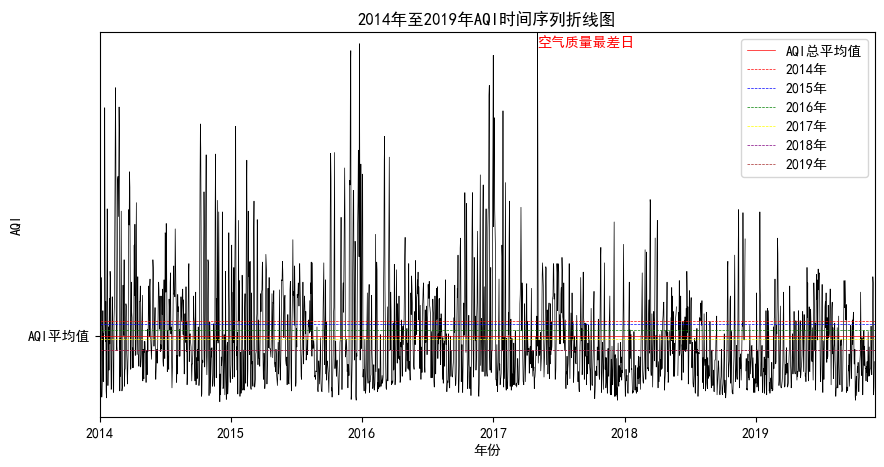

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False

data=pd.read_excel('北京市空气质量数据.xlsx')
data=data.replace(0,np.NaN)

plt.figure(figsize=(10,5))
plt.plot(data['AQI'],color='black',linestyle='-',linewidth=0.5)
plt.axhline(y=data['AQI'].mean(),color='red', linestyle='-',linewidth=0.5,label='AQI总平均值')
data['年']=data['日期'].apply(lambda x:x.year)
AQI_mean=data['AQI'].groupby(data['年']).mean().values
year=['2014年','2015年','2016年','2017年','2018年','2019年']
col=['red','blue','green','yellow','purple','brown']
for i in range(6):
    plt.axhline(y=AQI_mean[i],color=col[i], linestyle='--',linewidth=0.5,label=year[i])
plt.title('2014年至2019年AQI时间序列折线图')
plt.xlabel('年份')
plt.ylabel('AQI')
plt.xlim(xmax=len(data), xmin=1)
plt.ylim(ymax=data['AQI'].max(),ymin=1)
plt.yticks([data['AQI'].mean()],['AQI平均值'])
plt.xticks([1,365,365*2,365*3,365*4,365*5],['2014','2015','2016','2017','2018','2019'])
plt.legend(loc='best')
plt.text(x=list(data['AQI']).index(data['AQI'].max()),y=data['AQI'].max()-20,s='空气质量最差日',color='red')
plt.show()

代码说明：
（1）第3行：Matplotlib的Pyplot子模块，指定别名为plt。
（2）第5至7行：指定立即显示所绘图形，且通过参数设置解决图形中文显示乱码问题。
（3）第12行：利用函数plt.figure说明图形的一般特征，如这里宽为10高5。
（4）第13行：利用函数plt.plot绘制序列折线图（还可以绘制其他图）。同时，指定折线颜色、线形、线宽等。
（5）第14行：利用函数plt.axhline在参数y指定的位置上画一条平行于横坐标的直线，并给定直线图例文字。plt.axvline可参数x指定的位置上画一条平行于纵坐标的直线。
（6）第16至20行：首先，分组计算各年AQI的平均值；然后，通过for循环绘制多条平行于横坐标的直线，表征各年AQI平均值。
（7）第21至23行：利用title()、xlabel()、ylabel()指定图的标题，横纵坐标的坐标标签。
（8）第24，25行：利用xlim()、ylim()指定横纵坐标的取值范围。
（9）第26，27行：利用xticks()、yticks()在指定坐标刻度位置上给出刻度标签。
（10）第28行：利用legend()在指定位置（这里best表示最优位置）显示图例。
（11）第29行：利用text()在指定的行列位置上显示指定文字
（12）第30行：利用show()表示本次绘图结束。

Text(0.5, 1.0, '空气质量整体情况的饼图')

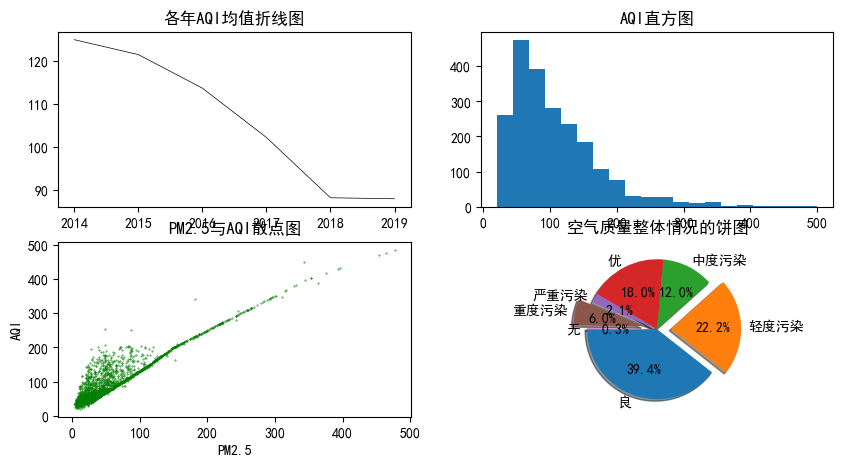

In [7]:
import warnings
warnings.filterwarnings(action = 'ignore')
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.plot(AQI_mean,color='black',linestyle='-',linewidth=0.5)
plt.title('各年AQI均值折线图')
plt.xticks([0,1,2,3,4,5],['2014','2015','2016','2017','2018','2019'])
plt.subplot(2,2,2)
plt.hist(data['AQI'],bins=20)
plt.title('AQI直方图')
plt.subplot(2,2,3)
plt.scatter(data['PM2.5'],data['AQI'],s=0.5,c='green',marker='.')
plt.title('PM2.5与AQI散点图')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.subplot(2,2,4)
tmp=pd.value_counts(data['质量等级'],sort=False)  #等同：tmp=data['质量等级'].value_counts()
share=tmp/sum(tmp)
labels=tmp.index
explode = [0, 0.2, 0, 0, 0,0.2,0]
plt.pie(share, explode = explode,labels = labels, autopct = '%3.1f%%',startangle = 180, shadow = True)
plt.title('空气质量整体情况的饼图')

#代码说明： 
（1）第1，2行：导入warnings模块，并指定忽略代码运行过程中的警告信息。
（2）第4行：subplot(2,2,1)表示将绘图区域分成2行2列4个单元，且下一副图将在第1个单元显示。
（3）第8行：subplot(2,2,2)表示将绘图区域分成2行2列4个单元，且下一副图将在第2个单元显示。
（4）第9行：利用hist()绘制AQI的直方图，图中包含20个柱形条，即将数据分成20组。
（5）第12行：利用scatter()绘制PM2.5和AQI的散点图。并指定点的大小（s），颜色（c）和形状（marker）。
（6）第21行：利用pie()绘制饼图。

#由于上面四幅图出现了重叠现象，因此采用以下方式对图形进行优化调整。

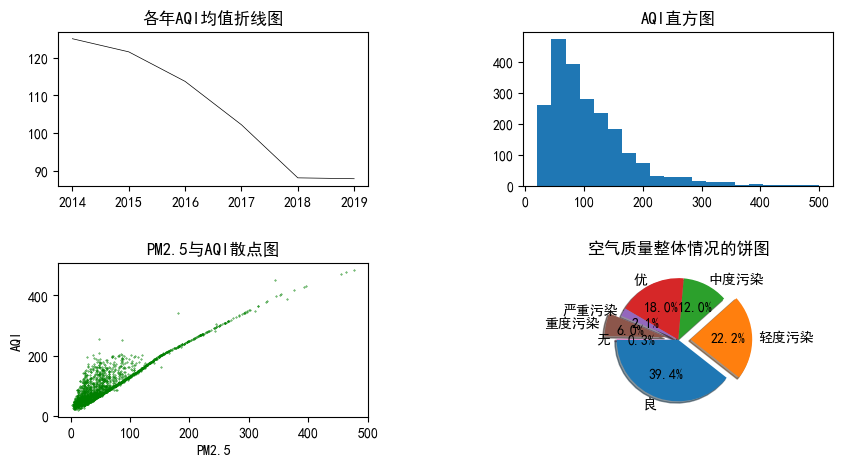

In [8]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,5))
axes[0,0].plot(AQI_mean,color='black',linestyle='-',linewidth=0.5)
axes[0,0].set_title('各年AQI均值折线图')
axes[0,0].set_xticks([0,1,2,3,4,5])
axes[0,0].set_xticklabels(['2014','2015','2016','2017','2018','2019'])
axes[0,1].hist(data['AQI'],bins=20)
axes[0,1].set_title('AQI直方图')
axes[1,0].scatter(data['PM2.5'],data['AQI'],s=0.5,c='green',marker='.')
axes[1,0].set_title('PM2.5与AQI散点图')
axes[1,0].set_xlabel('PM2.5')
axes[1,0].set_ylabel('AQI')
axes[1,1].pie(share, explode = explode,labels = labels, autopct = '%3.1f%%',startangle = 180, shadow = True)
axes[1,1].set_title('空气质量整体情况的饼图')
fig.subplots_adjust(hspace=0.5)
fig.subplots_adjust(wspace=0.5)

#代码说明：
（1）第1行：说明绘图区域的宽和高，并指定将绘图区域分成2行2列4个单元。结果将赋值给fig和axes对象。可通过fig对整个图的特征进行设置，axes对应各个单元格对象。
（2）通过图形单元索引的方式指定绘图单元。例如：axes[0,0]表示第1行第1列的单元格。
（3）单元格对象的图标题、坐标轴标签、坐标刻度等，需采用set_title()、set_xlabel()、set_ylabel()、set_xticks()、set_xticklabels()设置。
（4）第14，15行：利用subplots_adjust调整各图形单元行或列之间的距离。
